# Preprocess Image

In [1]:
from matplotlib import pyplot as plt
import cv2

def canny(img):
    return cv2.Canny(
        img,
        threshold1=123,
        threshold2=123
    )

def thresh(img):
    return cv2.adaptiveThreshold(
        img,
        255.0,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV,
        11,
        3
    )

def subplot_with_title(ax, img, title, gray=True):
    if gray:
        ax.imshow(img, cmap='gray')
    else:
        ax.imshow(img)
    ax.set_title(title)

In [2]:
doggo = cv2.imread('./demo-yolov4-tiny/dog.jpg')

img = cv2.cvtColor(doggo, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

gauss = cv2.GaussianBlur(gray,(3,3),0)
bilat = cv2.bilateralFilter(gray, 13, 15, 15)

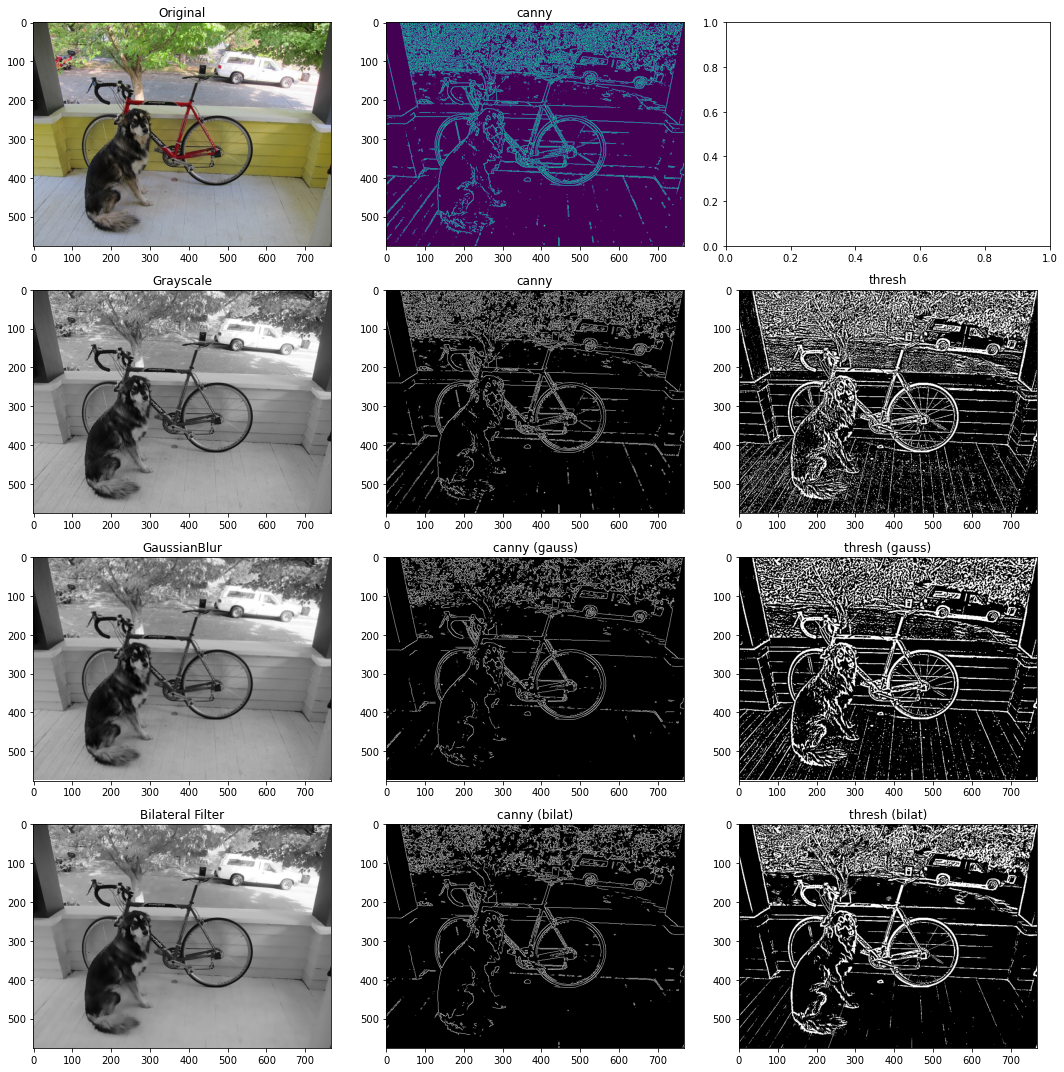

In [3]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15,15))

subplot_with_title(ax[0,0], img, 'Original', gray=False)
subplot_with_title(ax[1,0], gray, 'Grayscale')
subplot_with_title(ax[2,0], gauss, 'GaussianBlur')
subplot_with_title(ax[3,0], bilat, 'Bilateral Filter')

subplot_with_title(ax[0,1], canny(img), 'canny', gray=False)
subplot_with_title(ax[1,1], canny(gray), 'canny')
subplot_with_title(ax[2,1], canny(gauss), 'canny (gauss)')
subplot_with_title(ax[3,1], canny(bilat), 'canny (bilat)')

#subplot_with_title(ax[0,2], thresh(img), 'thresh', gray=False)
subplot_with_title(ax[1,2], thresh(gray), 'thresh')
subplot_with_title(ax[2,2], thresh(gauss), 'thresh (gauss)')
subplot_with_title(ax[3,2], thresh(bilat), 'thresh (bilat)')

plt.tight_layout()
plt.show()